# Visualizing Word Embeddings

In [117]:
import pandas as pd
import numpy as np
import flair
from sklearn.preprocessing import LabelEncoder
from flair.embeddings import WordEmbeddings,TransformerWordEmbeddings,ELMoEmbeddings
import seaborn as sns
import matplotlib.pyplot as plt

from flair.data import Sentence,Token

### Pretrained Language Models

1. Glove
2. Bert
3. ELMO

Defining some helper functions that would plot the embeddings on a lower dimension for easier visualization

In [216]:
def get_embeddings(text,emb_model):
    sentence = Sentence(text)
    emb_model.embed(sentence)
    emb_token = [ token.embedding.numpy() for token in sentence]
    emb_mat=np.matrix([e for e in emb_token])
    print(emb_mat.shape)
    return emb_mat,sentence.tokens
    

In [210]:
def tsne_plot_embeddings(emb_mat,tokens,perplexity=30):
    tsne = TSNE(n_components=2,random_state=12,perplexity=perplexity)
    emb_tsne = tsne.fit_transform(emb_mat)
    emb_tsne_data = np.vstack((emb_tsne.T, tokens)).T
    df_tsne = pd.DataFrame(emb_tsne_data, columns=['Dim1', 'Dim2', 'token'])
    ax = sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue='token')
    ax.set_title('T-SNE ELMO Embeddings, colored by Part of Speech Tag')
    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    label_point(df_tsne.Dim1, df_tsne.Dim2, pd.Series([t.text for t in df_tsne.token]), plt.gca())

In [127]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))  

Glove

(112, 100)


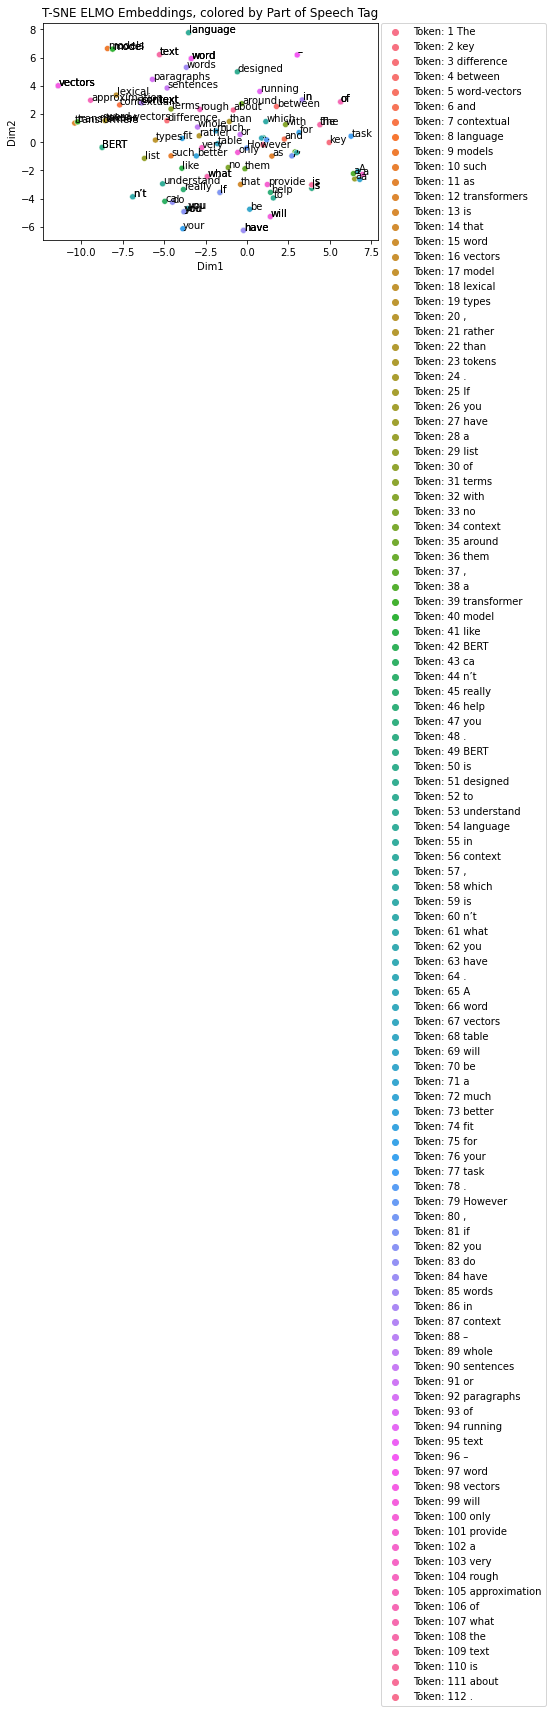

In [214]:
perplexity_s=32
text='The key difference between word-vectors and contextual language models such as transformers is that word vectors model lexical types, rather than tokens. If you have a list of terms with no context around them, a transformer model like BERT can’t really help you. BERT is designed to understand language in context, which isn’t what you have. A word vectors table will be a much better fit for your task. However, if you do have words in context – whole sentences or paragraphs of running text – word vectors will only provide a very rough approximation of what the text is about.'
glove_embedding = WordEmbeddings('glove')
embeddings,tokens=get_embeddings(text,glove_embedding)
tsne_plot_embeddings(embeddings,tokens,perplexity_s)

Bert

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

(112, 768)


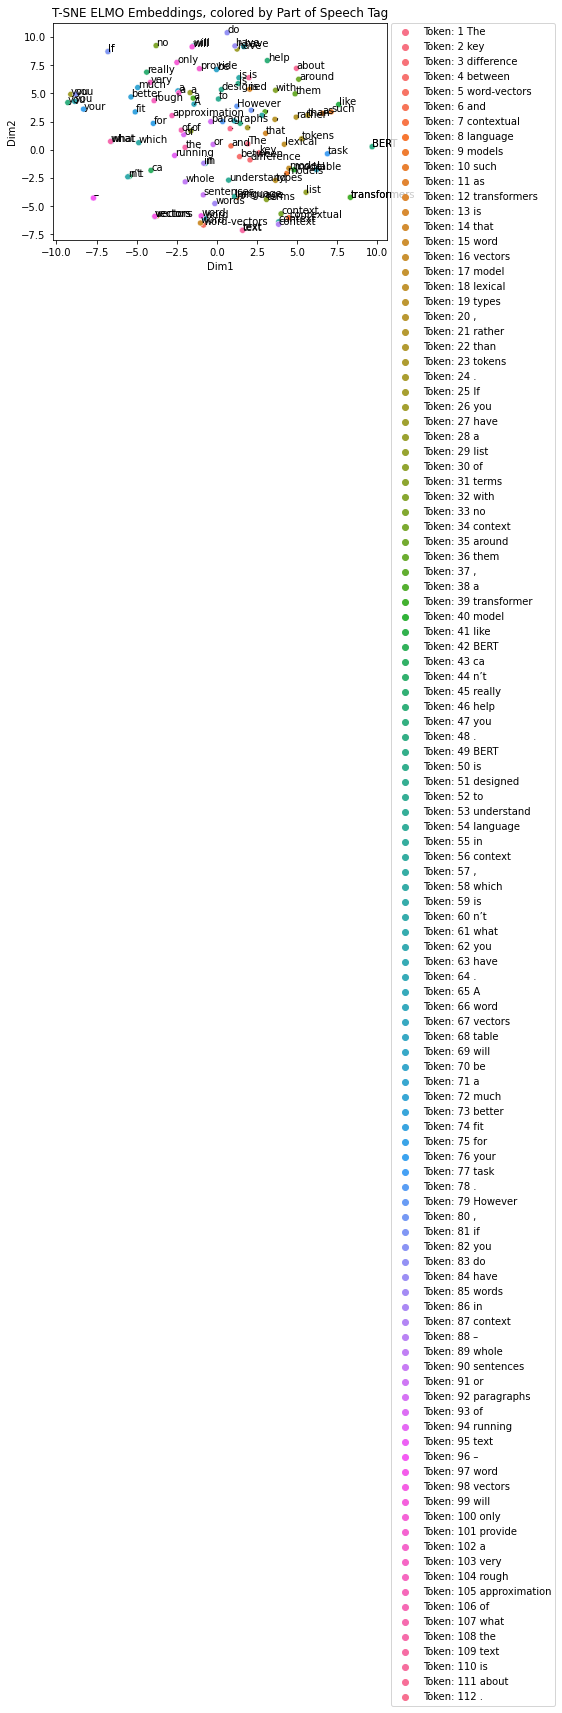

In [217]:
bert_embedding = TransformerWordEmbeddings('bert-base-multilingual-cased')
embeddings,tokens=get_embeddings(text,bert_embedding)
tsne_plot_embeddings(embeddings,tokens,35)

ELMO

100%|█████████████████████████████████████████████████████████████████| 374434792/374434792 [15:48<00:00, 394582.20B/s]


(112, 768)


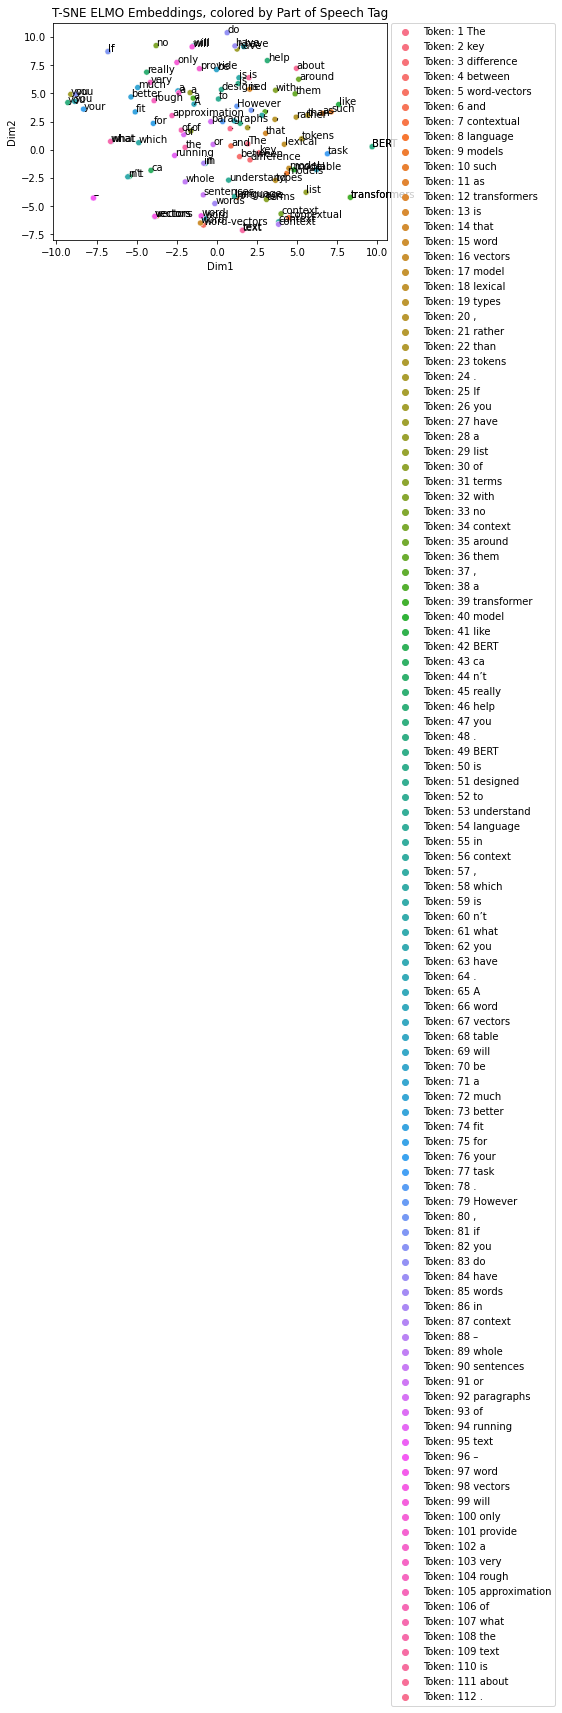

In [221]:
elmo_embedding =  ELMoEmbeddings()
embeddings,tokens=get_embeddings(text,bert_embedding)
tsne_plot_embeddings(embeddings,tokens,35)

####  Example 2

In [267]:
text="""After playing a game of Football,  we went out to watch a play in a nearby theatre. 
It was based on Anderson and longtime collaborator Hugo Guinness's vision of a fragmented tale of a character inspired by a mutual friend. 
The actors played their roles very well and came as no surprise since we have already seen some of their earlier work. 
Although I was not wearing a watch I knew we were getting late.

"""

(81, 100)


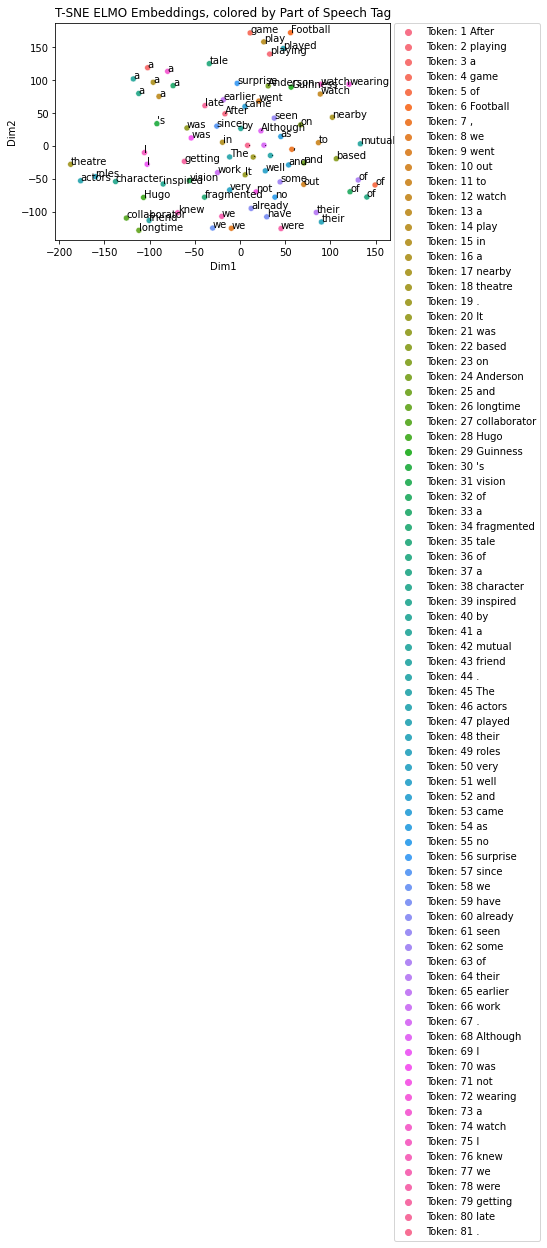

In [268]:
perplexity_s=28
glove_embedding = WordEmbeddings('glove')
embeddings,tokens=get_embeddings(text,glove_embedding)
tsne_plot_embeddings(embeddings,tokens,perplexity_s)

(81, 768)


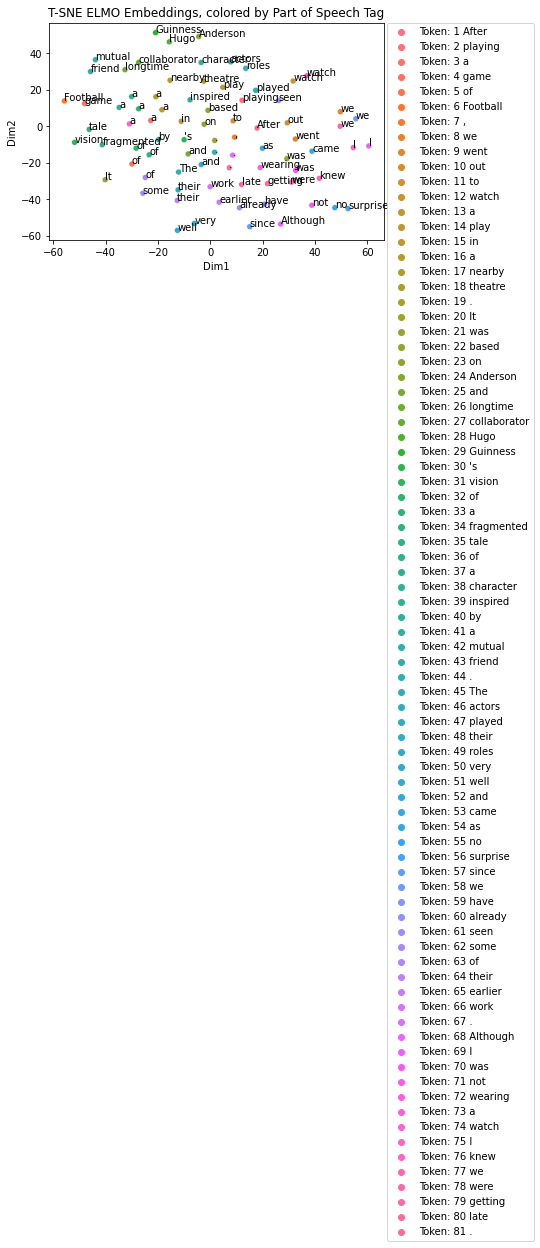

In [270]:
perplexity_s=35
bert_embedding = TransformerWordEmbeddings('bert-base-multilingual-cased')
embeddings,tokens=get_embeddings(text,bert_embedding)
tsne_plot_embeddings(embeddings,tokens,perplexity_s)